In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

In [2]:
from graphviz import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 100% !important; height: 100% !important;} </style>"
HTML(style)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
titanic_data = pd.read_csv('titanic_data/train.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [8]:
X = pd.get_dummies(X)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [9]:
X.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [10]:
X.Age = X.Age.fillna(X.Age.median())

In [11]:
y = titanic_data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [13]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

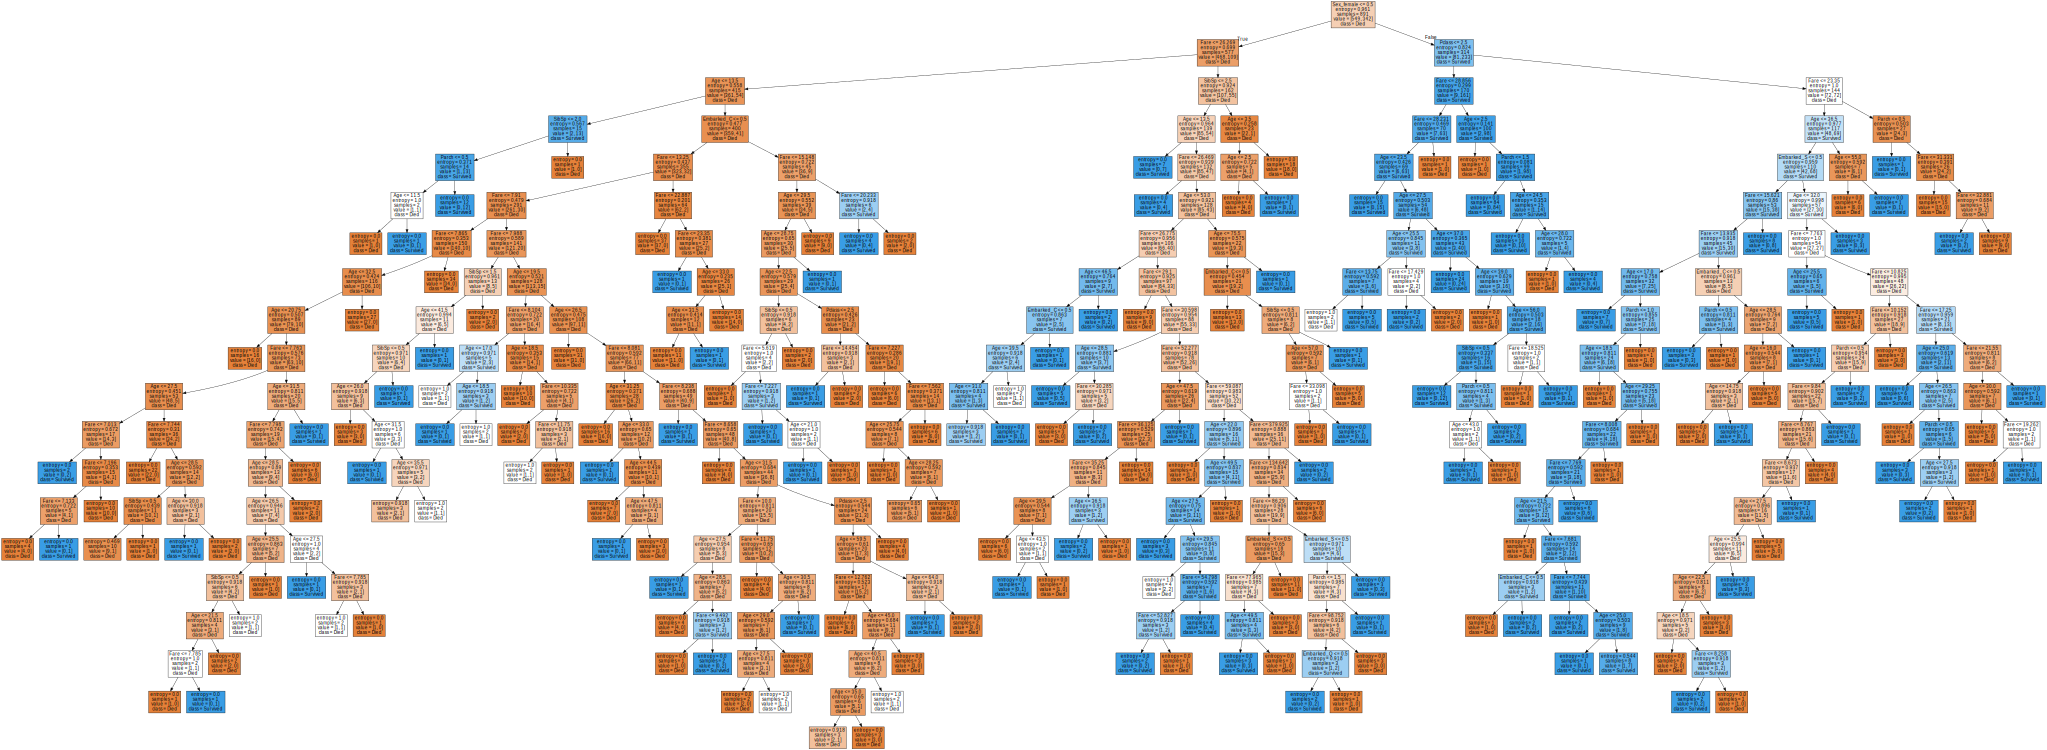

In [14]:
graph = Source(
    tree.export_graphviz(clf, 
                         out_file=None, 
                         feature_names=list(X),
                         class_names=['Died', 'Survived'], 
                         filled=True)
)
display(SVG(graph.pipe(format='svg')))

In [15]:
import re
import ipywidgets as widgets
# from IPython.display import SVG, HTML
# from graphviz import Source

In [16]:

def draw_graphviz(graph):
    graph = Source(graph)
    image = graph.pipe(format="svg")
    svg = SVG(image)
    svg_data = svg.data
    svg_data = re.sub(
        r'<svg xmlns=\"http://www\.w3\.org/2000/svg\" xmlns:xlink=\"http://www\.w3\.org/1999/xlink\" width=\"\d+pt\" height=\"\d+pt\"',
        '<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="100%" height="100%"',
        svg_data,
    )
    
    @widgets.interact(scale=widgets.IntSlider(min=30, max=500, step=1, value=100, description="Scale (%):", continuous_update=False))
    def _draw_svg(scale):
        return HTML('<div style="width: {width}%;">{svg}</div>'.format(width=scale, svg=svg_data))
    return _draw_svg

graph = tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=["Died", "Survived"], filled=True)
draw_graphviz(graph)

interactive(children=(IntSlider(value=100, continuous_update=False, description='Scale (%):', max=500, min=30)…

<function __main__.draw_graphviz.<locals>._draw_svg(scale)>

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

In [18]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
626,2,57.0,0,0,12.3500,0,1,0,1,0
142,3,24.0,1,0,15.8500,1,0,0,0,1
479,3,2.0,0,1,12.2875,1,0,0,0,1
742,1,21.0,2,2,262.3750,1,0,1,0,0
442,3,25.0,1,0,7.7750,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
277,2,28.0,0,0,0.0000,0,1,0,0,1
817,2,31.0,1,1,37.0042,0,1,1,0,0
255,3,29.0,0,2,15.2458,1,0,1,0,0
320,3,22.0,0,0,7.2500,0,1,0,0,1


In [19]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
770,3,24.0,0,0,9.5000,0,1,0,0,1
853,1,16.0,0,1,39.4000,1,0,0,0,1
144,2,18.0,0,0,11.5000,0,1,0,0,1
141,3,22.0,0,0,7.7500,1,0,0,0,1
261,3,3.0,4,2,31.3875,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
557,1,28.0,0,0,227.5250,0,1,1,0,0
544,1,50.0,1,0,106.4250,0,1,1,0,0
123,2,32.5,0,0,13.0000,1,0,0,0,1
602,1,28.0,0,0,42.4000,0,1,0,0,1


In [20]:
clf.score(X, y)

0.9797979797979798

In [21]:
clf.score(X_train, y_train)

0.9848993288590604

In [22]:
clf.score(X_test, y_test)

0.9694915254237289

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
clf.score(X_train, y_train)

0.9848993288590604

In [25]:
clf.score(X_test, y_test)

0.7694915254237288

In [26]:
clf1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [27]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

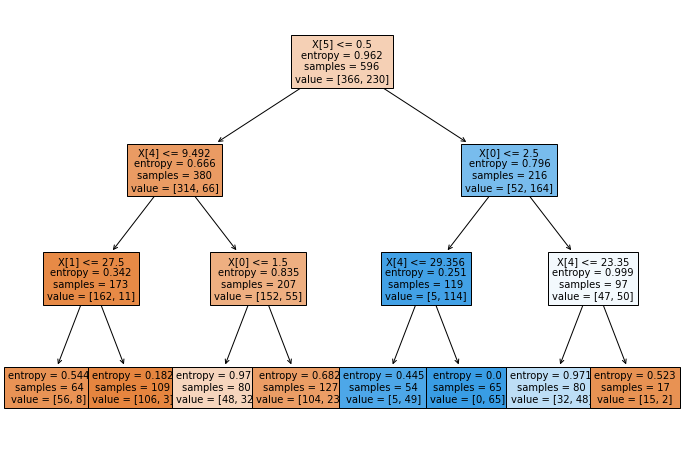

In [28]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf1, filled=True, fontsize=10);

In [29]:
graph1 = tree.export_graphviz(clf1, out_file=None, feature_names=list(X), class_names=["Died", "Survived"], filled=True)
draw_graphviz(graph1)

interactive(children=(IntSlider(value=100, continuous_update=False, description='Scale (%):', max=500, min=30)…

<function __main__.draw_graphviz.<locals>._draw_svg(scale)>

In [30]:
clf1.score(X_train, y_train)

0.8238255033557047

In [31]:
clf1.score(X_test, y_test)

0.7830508474576271

## Hyperparameter tuning

In [32]:
max_depth_values = range(1, 100)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
scores_data = pd.DataFrame()

In [35]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_scores = pd.DataFrame({'max_depth': [max_depth],
                                'train_score': [train_score],
                                'test_score': [test_score],
                                'mean_cross_score': [mean_cross_val_score]})
    
    scores_data = pd.concat([scores_data, temp_scores])

NameError: name 'cross_val_score' is not defined

In [ ]:
scores_data.plot.line(x='max_depth', y=['train_score', 'test_score', 'mean_cross_score'])

In [ ]:
scores_data.head()

In [ ]:
scores_data_long = pd.melt(frame=scores_data,
                           id_vars='max_depth',
                           value_vars=['train_score', 'test_score', 'mean_cross_score'],
                           var_name='set_type',
                           value_name='score')

In [ ]:
scores_data_long.tail()

In [ ]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

In [ ]:
scores_data_long.query('set_type == "mean_cross_score"').score.max()

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

## iris data 

### task
Убедимся в том, что всё так происходит на самом деле. Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

In [ ]:
train_iris = pd.read_csv('train_iris.csv', index_col=0)
test_iris = pd.read_csv('test_iris.csv', index_col=0)
train_iris.head()

In [ ]:
Xtrain = train_iris.drop('species', axis=1)
ytrain = train_iris.species
Xtest = test_iris.drop('species', axis=1)
ytest = test_iris.species


In [ ]:
np.random.seed(0)
score_frame = pd.DataFrame(columns=['max_depth', 'set_type', 'score'])
for k in range(1, 101):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=k)
    clf.fit(Xtrain, ytrain)
    score_frame.loc[2*k-1] = [k, 'train_score', clf.score(Xtrain, ytrain)]
    score_frame.loc[2*k] = [k, 'test_score', clf.score(Xtest, ytest)]

In [ ]:
score_frame

In [ ]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=score_frame)

In [ ]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=score_frame)

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
X, y = load_iris(return_X_y=True)

In [ ]:
X.shape

In [ ]:
train_iris.shape, test_iris.shape

### dogs and cats

In [ ]:
d_n_c = pd.read_csv("dogs_n_cats.csv")

In [ ]:
d_n_c.head()

In [ ]:
d_n_c.describe()